<a href="https://colab.research.google.com/github/nathnascimentto2/Best-README-Template/blob/master/ML_Trabalho_Final_Nathalia_Nascimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizado de Máquina**
## **Trabalho Final**

- Foi utilizado o dataset "Pistachio types detection" que contém algumas das características de dois tipos de grãos de pistache.
https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection

- Três tipos de métodos foram verificados para a realização dessa classificação: Regressão Logistica, SVM e Árvore de Decisão;

In [4]:
!pip install -U mlflow --quiet
!pip install -U threadpoolctl --quiet

In [5]:
import pandas as pd
from sklearn import tree
import mlflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score

## **1) Carregamento do Dataset**

In [6]:
dataset_url = 'https://raw.githubusercontent.com/nathnascimentto2/ml_classification/main/data/pistachio.csv'
df_pistachio = pd.read_csv(dataset_url)

In [7]:
df_pistachio

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


## **2) Processamento dos dados**

In [8]:
df_pistachio.Class = df_pistachio.Class.replace({'Kirmizi_Pistachio': 1.0, 'Siit_Pistachio': 2.0})

In [10]:
X = df_pistachio.iloc[:,:-1]
y = df_pistachio.iloc[:, -1]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
X_data = pd.DataFrame(X_data, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=.3, random_state=42)

## **3) Criação e configuração dos modelos**

In [11]:
svc = SVC(random_state=42, C=100, kernel='linear')

In [12]:
ds_tree = DecisionTreeClassifier(random_state=42, max_depth=4)

In [13]:
log_reg = LogisticRegression()

## **4) Treino dos modelos**

In [14]:
mlflow.sklearn.autolog()

In [15]:
with mlflow.start_run(run_name='logistic_reg'):
  log_reg.fit(X_train, y_train)

2023/07/31 00:14:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [16]:
with mlflow.start_run(run_name='svc'):
  svc.fit(X_train, y_train)

In [17]:
with mlflow.start_run(run_name='decision_tree') as run:
  ds_tree.fit(X_train, y_train)

####Visualização da árvore de decisão

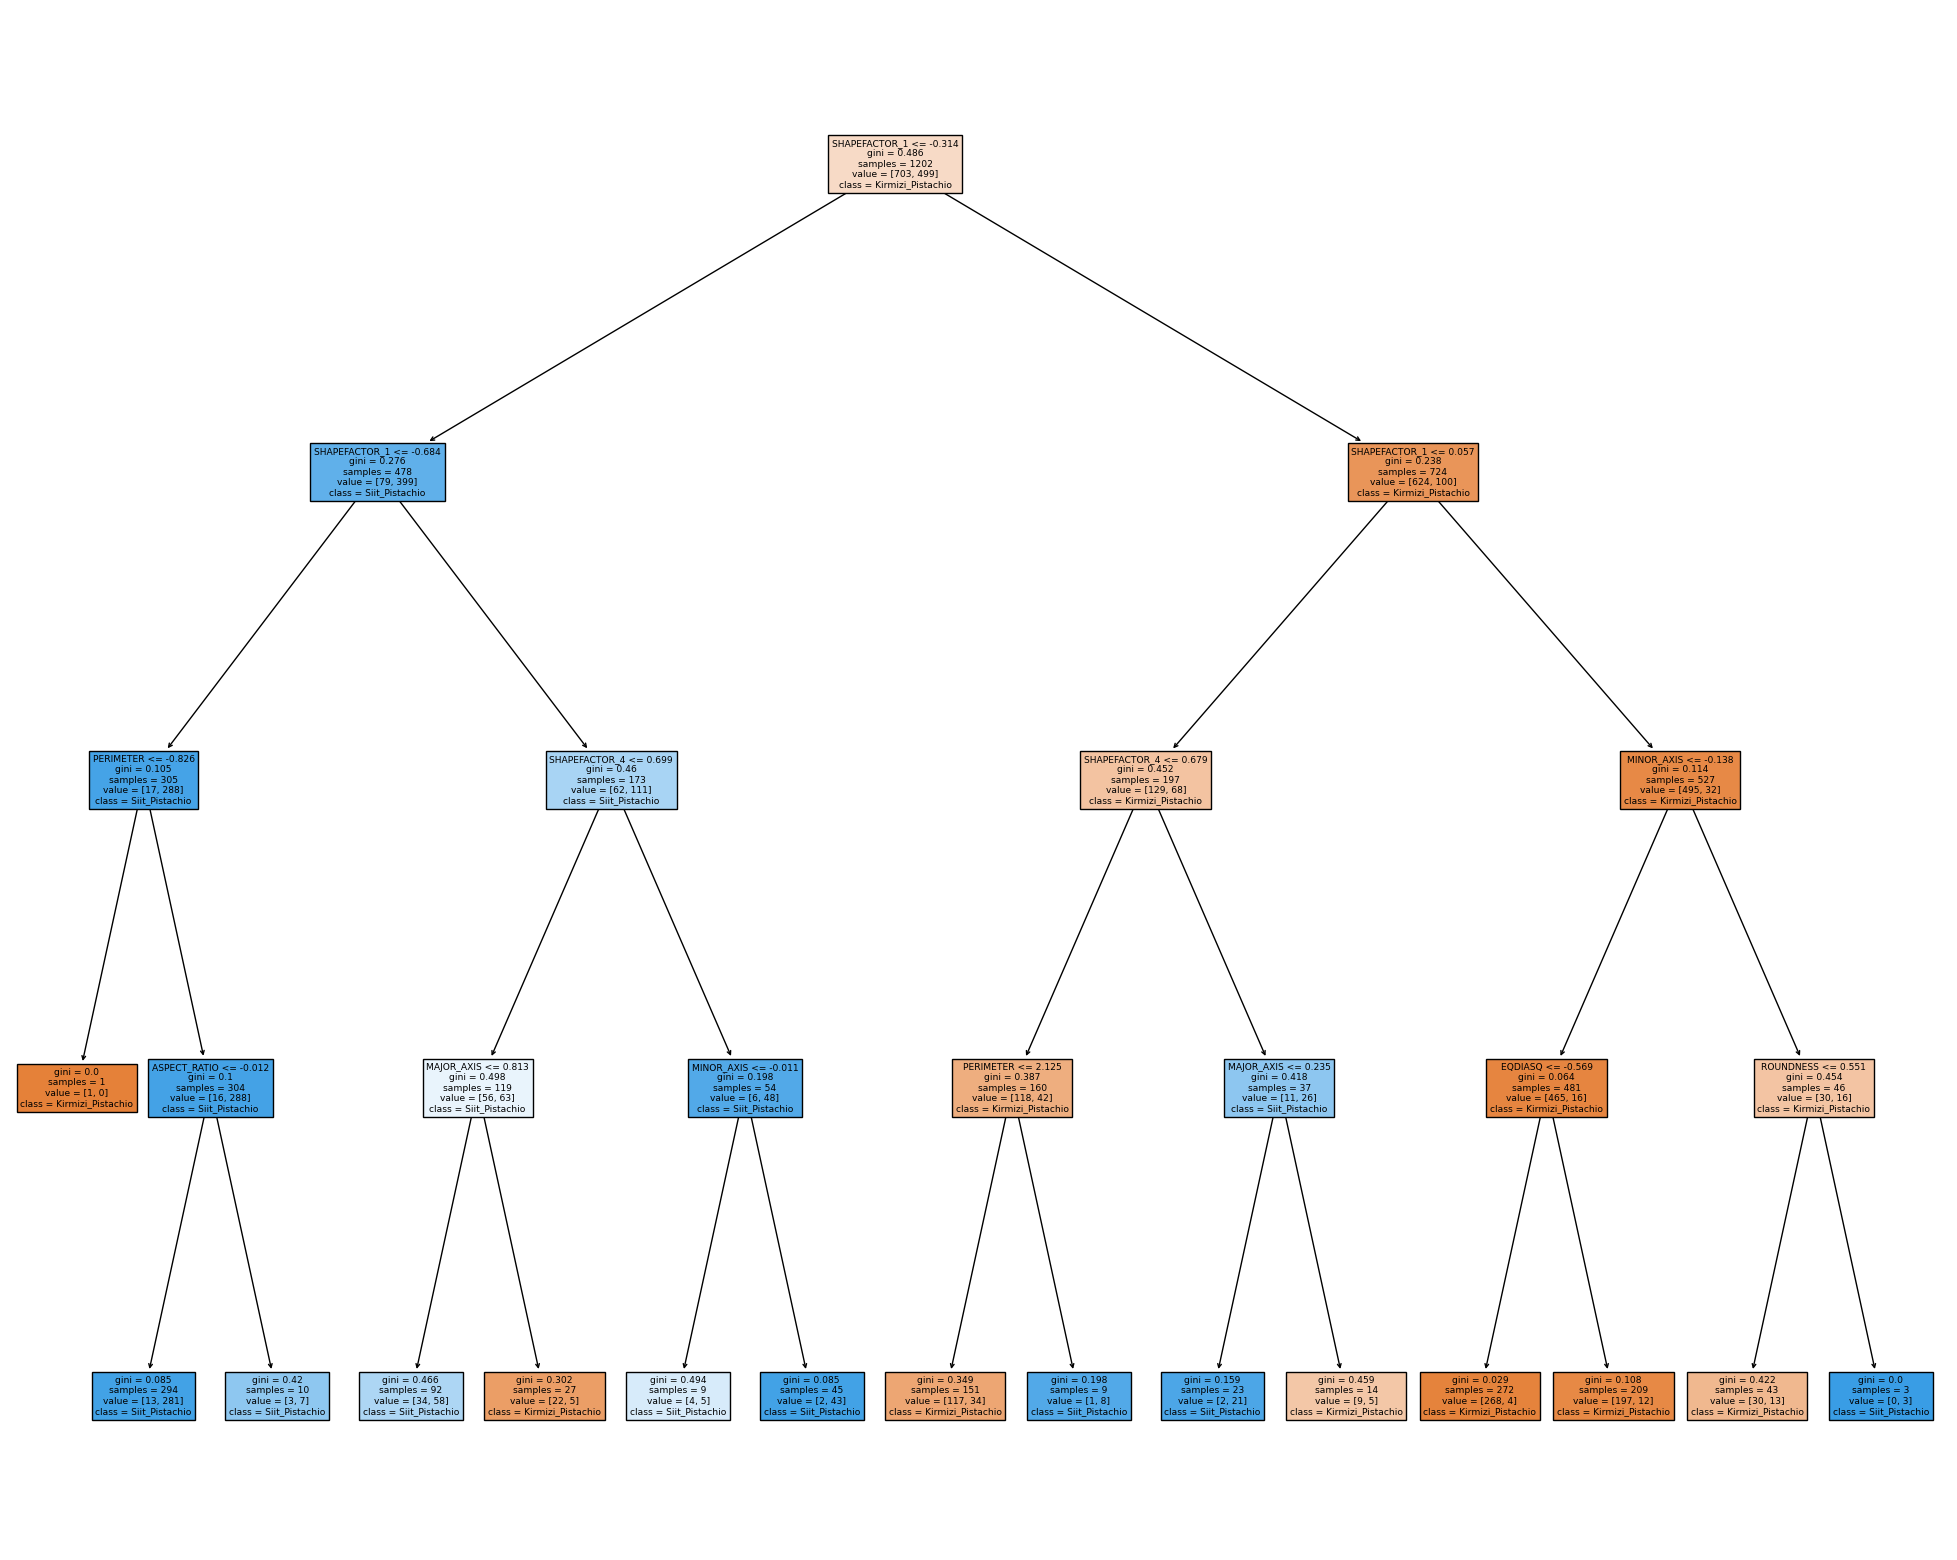

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ds_tree,
                   feature_names=df_pistachio.columns.tolist()[:-1],
                   class_names=['Kirmizi_Pistachio', 'Siit_Pistachio'],
                   filled=True)

## **5) Apresentação dos resultados**

In [19]:
svc_predicted = svc.predict(X_test)
tree_predicted = ds_tree.predict(X_test)
log_predicted = log_reg.predict(X_test)

- As métricas avaliadas foram a acurácia e a precisão dos modelos;
- As opções Regressão Logistica e SVM se mostraram superiores a árvore de decisão, indicando mais acertividade nas previsões;

In [20]:
print(accuracy_score(y_test, svc_predicted),
      accuracy_score(y_test, tree_predicted),
      accuracy_score(y_test, log_predicted))

0.8934108527131783 0.8682170542635659 0.8934108527131783


In [21]:
print(precision_score(y_test, svc_predicted),
      precision_score(y_test, tree_predicted),
      precision_score(y_test, log_predicted))

0.9081632653061225 0.8429003021148036 0.8973509933774835
